# 연관분석
항목 간의 연관성을 찾아내는데 사용되는 분석

## 평가 기준
- 지지도
    - 전체 거래수에서 A와 B를 동시에 구매한 비율
    -  (A와 B가 동시에 포함된 거래수) / (전체 거래수)
    - 삼겹살과 우유를 같이 살 확률
- 신뢰도
    - 특정 거래(A)에서 A와 B를 동시에 구매한 비율
    - (A와 B가 동시에 포함된 거래수) / (A 거래수)
- 향상도
    - A를 구매했을 때, B를 구매할 확률을 지표로 계산
    - 두 항목이 서로 독립적일 경우에 비해 얼마나 자주 동시에 발생하는지
        - 1 보다 크면 두 항목이 양의 상관관계
        - 1 보다 작으면 음의 상관관계
        - 1이면 서로 독립적

In [3]:
# 아나콘다에 없어서 다운해야됨~~
from mlxtend.frequent_patterns import apriori, association_rules

In [1]:
import pandas as pd

df1 = pd.read_csv("실습 파일/03_store_product.csv")
df1

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20220201,50142001,채소,잎/줄기채소,시금치,시금치(300g),1.0,2000,매장3,NaN,2101.0
1,20220201,60302012,축산물,육가공,돈가스/분쇄가공,튀김옷돈가스(400g),1.0,6300,매장3,NaN,2101.0
2,20220201,80301002,간식,밀가공,라면,감자라면(110g:1봉),2.0,2600,매장3,NaN,2101.0
3,20220201,80301010,간식,밀가공,라면,사리면(100g),1.0,900,매장3,NaN,2101.0
4,20220201,80305003,간식,밀가공,만두,고기만두(500g),1.0,5400,매장3,NaN,2101.0
...,...,...,...,...,...,...,...,...,...,...,...
735778,20220630,100201003,반찬,두부/유부,두부,두부(1모:420g),1.0,2200,매장3,NaN,2637.0
735779,20220630,100306006,반찬,즉석조리,간편요리,현미쌀가스(320g),1.0,5830,매장3,NaN,2637.0
735780,20220630,130214027,생활용품,생활용품,기타생활용품,모기기피제(로즈마리향),1.0,8470,매장3,NaN,2637.0
735781,20220630,130501098,생활용품,화장품,기초화장품,수피아 알로에베라잎즙 수딩젤,1.0,7370,매장3,NaN,2637.0


In [8]:
df1['label']=1
df2 = df1.pivot_table(index=['회원번호','공급일자'],
               columns='물품대분류', values='label', aggfunc='min',
               fill_value=0)
df2

물품대분류            간식  건강  과실  급식용  기타  반찬  베이커리  생활용품  서류  수산  양념/가루  음료  잡곡  \
회원번호   공급일자                                                                   
2101.0 20220102   0   0   0    0   0   0     0     0   0   0      0   0   0   
       20220103   0   0   0    0   0   0     0     0   0   0      0   0   0   
       20220104   1   0   0    0   0   0     0     0   0   0      0   0   0   
       20220105   0   1   0    0   0   0     0     0   0   0      1   0   0   
       20220106   0   0   0    0   0   0     0     0   0   0      0   0   0   
...              ..  ..  ..  ...  ..  ..   ...   ...  ..  ..    ...  ..  ..   
6492.0 20220630   0   0   0    0   0   1     0     1   0   0      0   0   0   
6493.0 20220630   0   0   0    0   0   0     0     0   0   0      1   0   0   
6494.0 20220630   0   0   0    0   0   1     0     0   0   0      0   0   0   
6495.0 20220630   0   0   1    0   0   0     0     0   0   0      0   0   0   
6496.0 20220630   1   0   0    0   0   0     0     1   0   1      0   1   0   

물품대분류            주곡  주류  채소  축산물  
회원번호   공급일자                       
2101.0 20220102   0   0   1    1  
       20220103   0   0   1    1  
       20220104   0   0   1    1  
       20220105   0   0   1    1  
       20220106   0   0   0    1  
...              ..  ..  ..  ...  
6492.0 20220630   0   0   1    0  
6493.0 20220630   0   0   0    1  
6494.0 20220630   0   0   0    0  
6495.0 20220630   0   0   0    0  
6496.0 20220630   0   0   1    1  

[96257 rows x 17 columns]

In [10]:
# 계산을 위해서 boolen 형식으로 값을 수정해줘야함
df3 = df2.applymap(lambda x: True if x>0 else False)
df3

물품대분류               간식     건강     과실    급식용     기타     반찬   베이커리   생활용품  \
회원번호   공급일자                                                               
2101.0 20220102  False  False  False  False  False  False  False  False   
       20220103  False  False  False  False  False  False  False  False   
       20220104   True  False  False  False  False  False  False  False   
       20220105  False   True  False  False  False  False  False  False   
       20220106  False  False  False  False  False  False  False  False   
...                ...    ...    ...    ...    ...    ...    ...    ...   
6492.0 20220630  False  False  False  False  False   True  False   True   
6493.0 20220630  False  False  False  False  False  False  False  False   
6494.0 20220630  False  False  False  False  False   True  False  False   
6495.0 20220630  False  False   True  False  False  False  False  False   
6496.0 20220630   True  False  False  False  False  False  False   True   

물품대분류               서류     수산  양념/가루     음료     잡곡     주곡     주류     채소    축산물  
회원번호   공급일자                                                                     
2101.0 20220102  False  False  False  False  False  False  False   True   True  
       20220103  False  False  False  False  False  False  False   True   True  
       20220104  False  False  False  False  False  False  False   True   True  
       20220105  False  False   True  False  False  False  False   True   True  
       20220106  False  False  False  False  False  False  False  False   True  
...                ...    ...    ...    ...    ...    ...    ...    ...    ...  
6492.0 20220630  False  False  False  False  False  False  False   True  False  
6493.0 20220630  False  False   True  False  False  False  False  False   True  
6494.0 20220630  False  False  False  False  False  False  False  False  False  
6495.0 20220630  False  False  False  False  False  False  False  False  False  
6496.0 20220630  False   True  False   True  False  False  False   True   True  

[96257 rows x 17 columns]

## 지지도

In [13]:
# use_colnames는 아이템이름을 확인할 수 있어서 보기 편함
# min_support는 최소 지지도를 말함
# 데이터셋 내에서 발생하는 빈도의 최소 비율
# 전체 항목 중에서 최소 20%에 등장하는 항목들만 고려

freq_item = apriori(df3,min_support=0.2, use_colnames=True)
freq_item

# (간식)간식의 지지도가 발생할 확률 = 간식만 구매할 확률
# (반찬)반찬의 지지도가 발생할 확률
# (반찬,간식)반찬과 간식을 동시에 구매할 확률

,support,itemsets
0,0.499257,(간식)
1,0.536314,(반찬)
2,0.337461,(수산)
3,0.253270,(양념/가루)
4,0.210083,(음료)
5,0.667037,(채소)
6,0.653854,(축산물)
7,0.299386,"(반찬, 간식)"
8,0.201876,"(간식, 수산)"
9,0.358499,"(간식, 채소)"


## 지지도, 향상도, 신뢰도 추출

In [15]:
# confidence 는 조건부 확률!
# min_threshold 는 신뢰도가 0.5이상인 규칙만 선택
rst = association_rules(freq_item, metric='confidence',
                       min_threshold=0.5)

rst

# 반찬 | 거래 
# | 전체 거래 중에 반찬의 지지도 0.536 |전체 거래 중에 간식의 지지도 0.499| 전체 거래 중 반찬과 간식을 동시 구매  0.299
# | 반찬을 구매한 거래에서 반찬과 간식을 동시에 구매한 확률 0.558 | 향상도 
# | 방향도 0인 경우 서로 독립 (양이면 양의 상관관계, 음이면 음의 상관관계)
# | 1에 가까울수록 두 항목이 독립적(크면 종속성이 약하게 있다) | 방향성과 강도 (-1~1) = 반찬과 간식간의 관계가 강하냐

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(반찬),(간식),0.536314,0.499257,0.299386,0.558229,1.118119,0.031627,1.133489,0.227828
1,(간식),(반찬),0.499257,0.536314,0.299386,0.599663,1.118119,0.031627,1.158238,0.210967
2,(수산),(간식),0.337461,0.499257,0.201876,0.598221,1.198221,0.033396,1.246313,0.249690
3,(간식),(채소),0.499257,0.667037,0.358499,0.718064,1.076498,0.025475,1.180987,0.141912
4,(채소),(간식),0.667037,0.499257,0.358499,0.537449,1.076498,0.025475,1.082568,0.213422
5,(축산물),(간식),0.653854,0.499257,0.360659,0.551590,1.104822,0.034218,1.116709,0.274095
6,(간식),(축산물),0.499257,0.653854,0.360659,0.722392,1.104822,0.034218,1.246889,0.189473
7,(수산),(반찬),0.337461,0.536314,0.222882,0.660469,1.231495,0.041897,1.365664,0.283725
8,(반찬),(채소),0.536314,0.667037,0.409809,0.764121,1.145545,0.052068,1.411585,0.274007
9,(채소),(반찬),0.667037,0.536314,0.409809,0.614372,1.145545,0.052068,1.202418,0.381584


# 계층적 군집분석
군집이 몇 개인지 모를때 사용                        
단계적으로 가장 가까운 데이터부터 병합해나가면서 하나의 군집이 될 때까지 진행

In [17]:
import matplotlib.pyplot as plot
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [19]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

## metrics : euclidean, mannhattan, cosine
- euclidean : 저차원에서 잘 작동하지만, 고차원에서는 성능저하 (고차원에서는 차원의 저주로, 서로의 거리가 비슷해짐)
- manhattan : 이상치에 덜 민감한 장점, 하지만 마찬가지로 고차원으로 갈수록 성능 저하
- cosine : 고차원에서 잘 작동하지만, 저차원에서는 성능이 안 좋을 수 있음!

## linkage
건드릴 필요는 거의의의의 없음!

- ward : 군집 내 분산을 최소화하는 방식 데이터를 연결
- complete : 최대 연결
- average : 평균 연결
- single : 최소 연결

In [28]:
# 기본값은 euclidean 이라서 적을 필요는 없움!
# linkage의 'ward' 역시 기본값이라서 적을 필요 없음
# 비지도학습이라서 n_cluster를 지정할 필요는 없지만, 그래도 3개로 만들고 싶을수도 있으니 n_clusters
cluster = AgglomerativeClustering(metric="euclidean", linkage = "ward",
                                 n_clusters=3)

# 비지도라서, 학습데이터만 적용
cluster.fit(X)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [30]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [31]:
# 어떻게 계산했는지도 알 수 있음
linked = linkage(X)
linked
# [1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
# 101번째와 142번째가 클러스터 되었다는 의미 : 이 둘의 거리가 0이고 병합된 신규 클러스터는 2개의 원소가 있다

# [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00]
# 7번째와 39번째가 클러스터 되었다는 의미 : 이 둘의 거리가 0.1이고 병합된 신규 클러스터는 2개의 원소가 있다

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+01, 1.52000000e+02, 1.41421356e-01, 3.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.56000000e+02, 1.57000000e+02, 1.41421356e-01, 5.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e

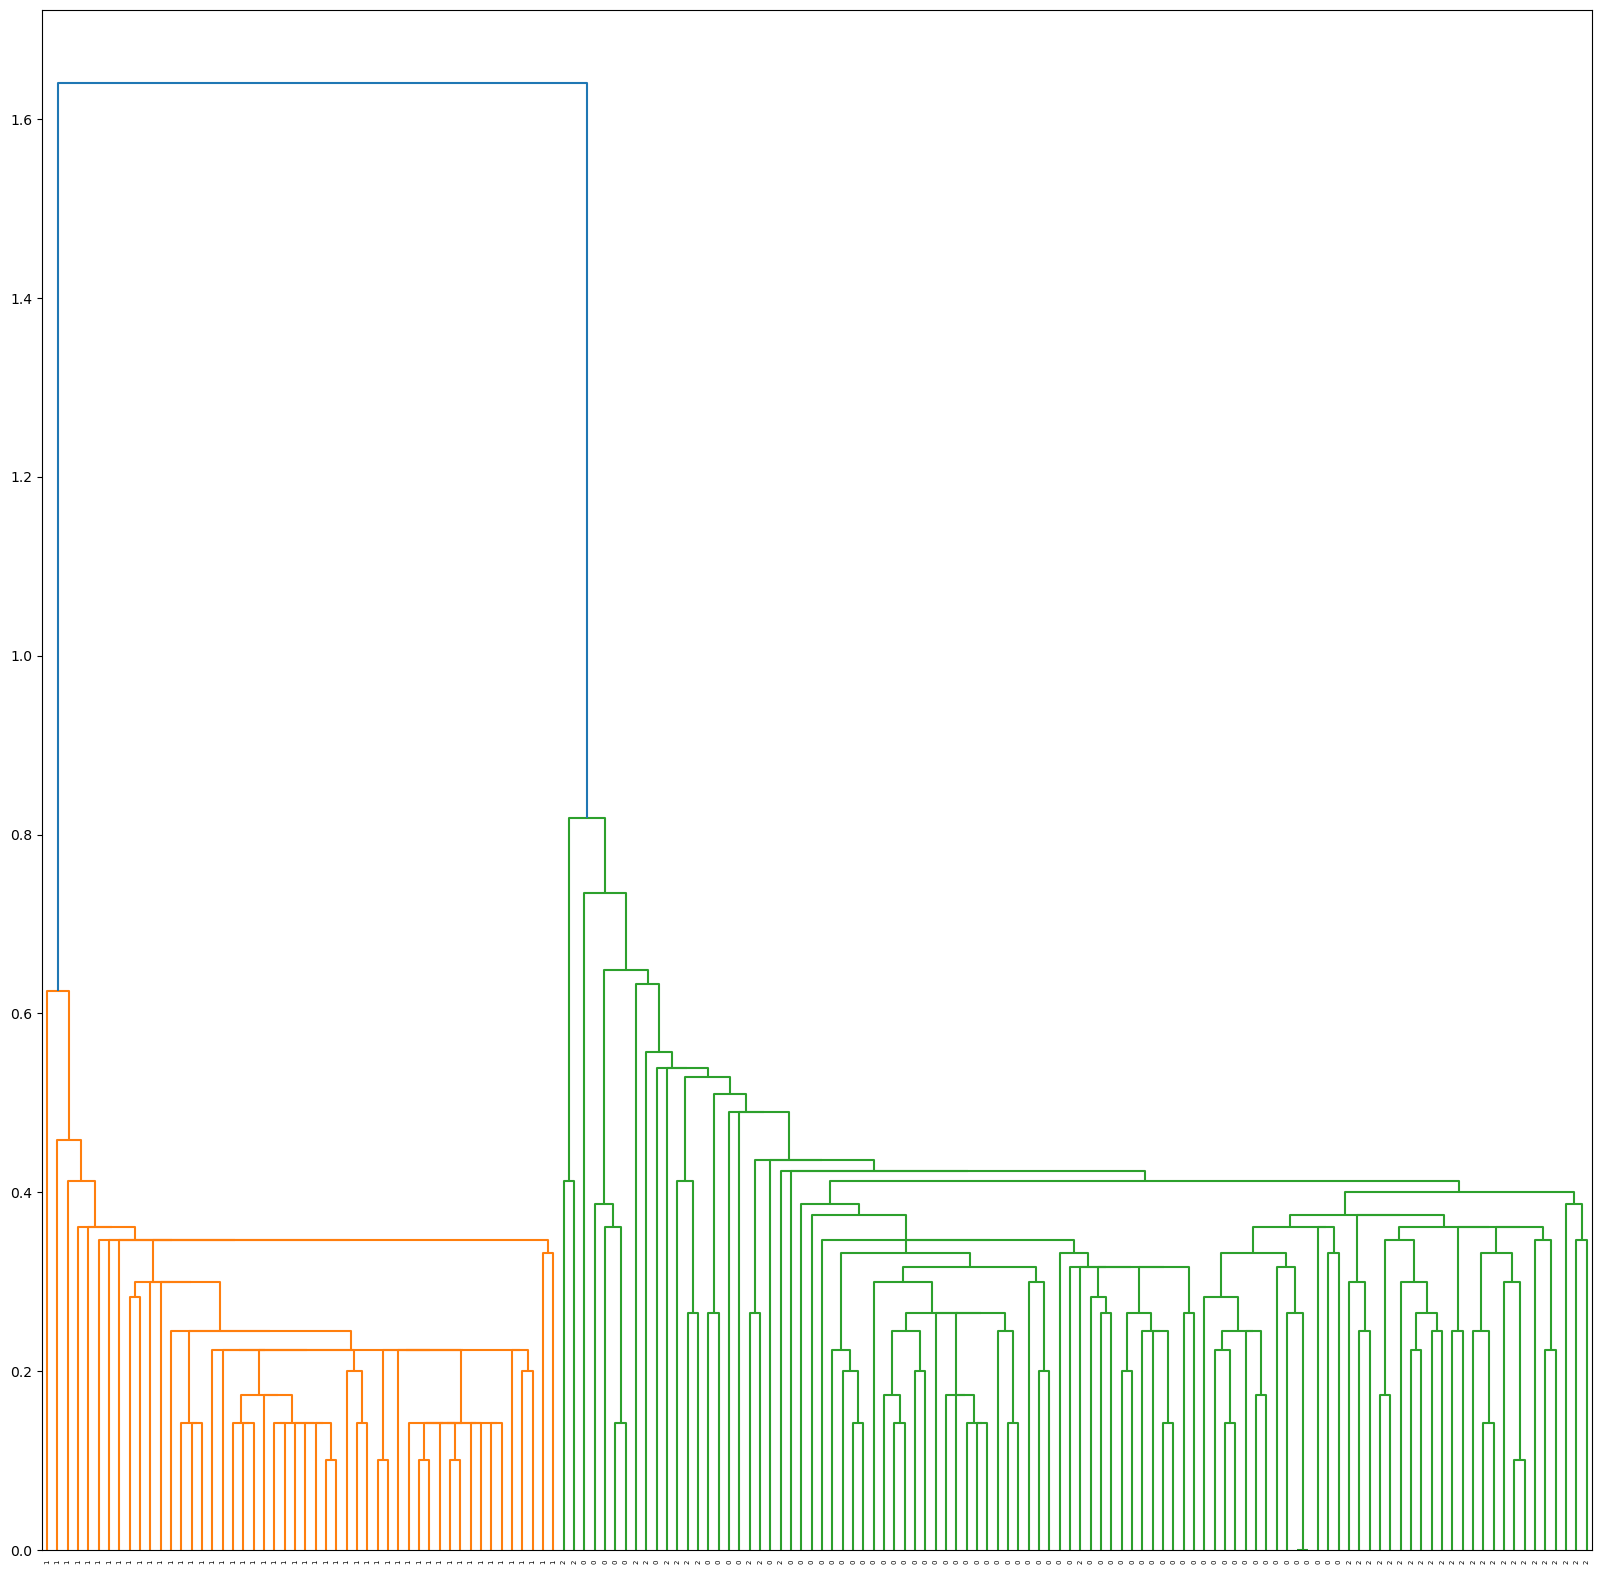

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
dendrogram(linked, labels=cluster.labels_)
plt.show()

## 실루엣 분석
클러스터 군집 내에서 잘 잡혔는지 측정하는 방법                
군집 내 데이터들이 얼마나 잘 모여있고, 다른 군집과 얼마나 잘 분리가 되었는지

- -1 ~ 1 사이의 값
    - 1에 가까울수록 군집이 잘 형성
    - 0에 가까울수록 경계가 모호
    - 음수라면 잘못된 군집

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

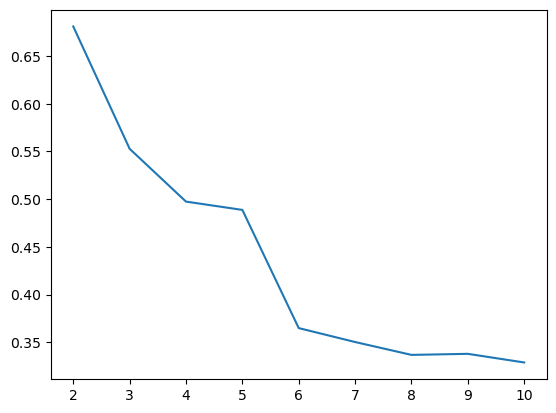

In [37]:
box = []

for  n in range(2, 11):
    km = KMeans(n_clusters=n)
    km.fit(X)
    s = silhouette_score(X, km.labels_)
    box.append(s)
    
plt.plot(range(2,11), box)
plt.show()